# Predicting Heart disease

_source : https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var_

#### Dependencies

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data into a pandas dataframe

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

#### Dataframe overview

In [7]:
def report_card(dataframe):
    """ Function to get fast dataframe overview. """
    print(dataframe.info())
    print("\n")
    print(dataframe.describe().T)
    print("\n")
    print(dataframe.head())

report_card(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [9]:
# Renaming columns in the original dataframe
df.rename(columns={"index":"Index",
"Chest pain type":"Chest_pain_type",
"FBS over 120":"FBS_over_120",
"EKG results":"EKG_results",
"Max HR":"Max_HR",
"Exercise angina":"Exercise_angina",
"ST depression":"ST_depression",
"Slope of ST":"Slope_of_ST",
"Number of vessels fluro":"Vessels_fluro",
"Heart Disease":"Heart_Disease"}, inplace=True)

In [11]:
df.columns

Index(['Index', 'Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol',
       'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina',
       'ST_depression', 'Slope_of_ST', 'Vessels_fluro', 'Thallium',
       'Heart_Disease'],
      dtype='object')

In [13]:
corr = df.corr()

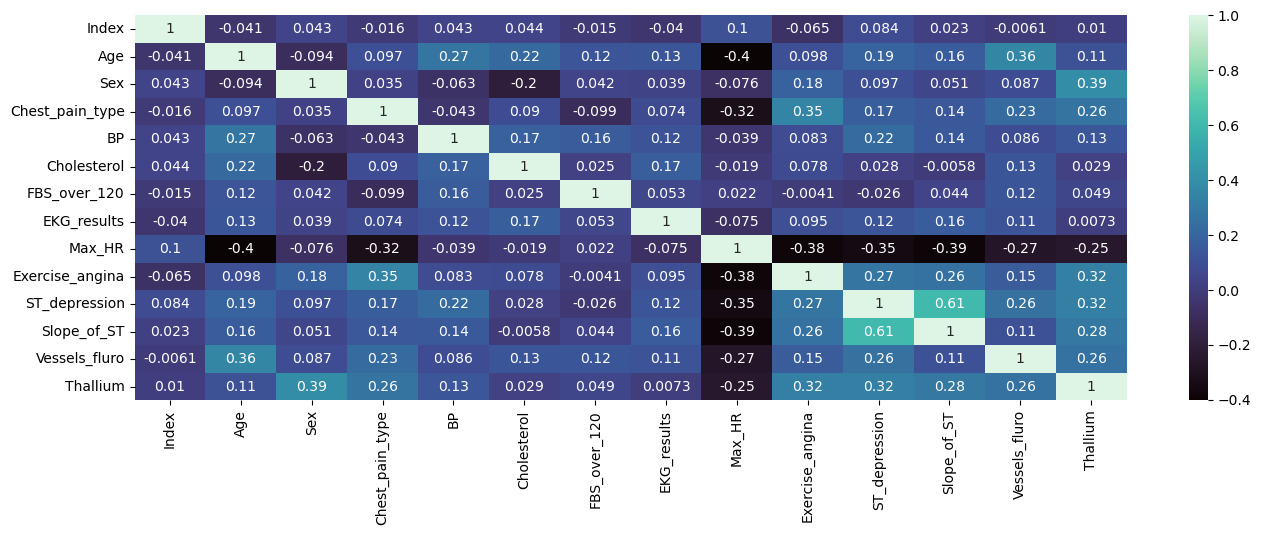

In [24]:
plt.figure(figsize=[16,5])
ax = sns.heatmap(corr, cmap="mako",  annot=True)

plt.show()

#### Steps to take into account

-  Feature selection methods to reduce the number of input features.

    - Categorical feature encoding
    - Standardize the data
    - id
    - Principal component Analysis?




- Optimizing the hyperparameters of your model can help you achieve better results. One way to do this is by using validation and grid search, which involves systematically exploring a range of hyperparameter values and selecting the combination that yields the best performance on the validation set.   

- To ensure that all features are on the same scale and can be compared equally, it may be helpful to scale or normalize your data. There are several techniques that can be used for this purpose, including StandardScaler, MinMaxScaler, RobustScaler, and Normalizer. Scaling or normalizing your data can help prevent features with large numerical values from dominating the model and can improve the performance of certain types of models, such as those that use distance-based measures or rely on weight optimization.

- Ensembling methods will probably help this notebook produce better results, You can easily do this by simply training the same model multiple times using different seeds and avg the results.

- weighted probability averaging 

- Target encoding:You may want to consider using target encodingto encode your categorical variables. Target encoding can help you improve your model performance.



